<a href="https://colab.research.google.com/github/Talhadeveloperr/iris_flower_Clsf/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# 1. Importing Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Classifiers to test
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
# ---------------------- 2. Load & Prepare Dataset ----------------------
iris = load_iris()

In [30]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

In [31]:
# Convert target to class labels
y = y.map(dict(enumerate(iris.target_names)))

In [32]:
# Display sample data
print(X.head())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [33]:
# Display basic info
print("\nData Shape:", X.shape)
print("Missing Values:\n", X.isnull().sum())
print("Class Distribution:\n", y.value_counts())


Data Shape: (150, 4)
Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Class Distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


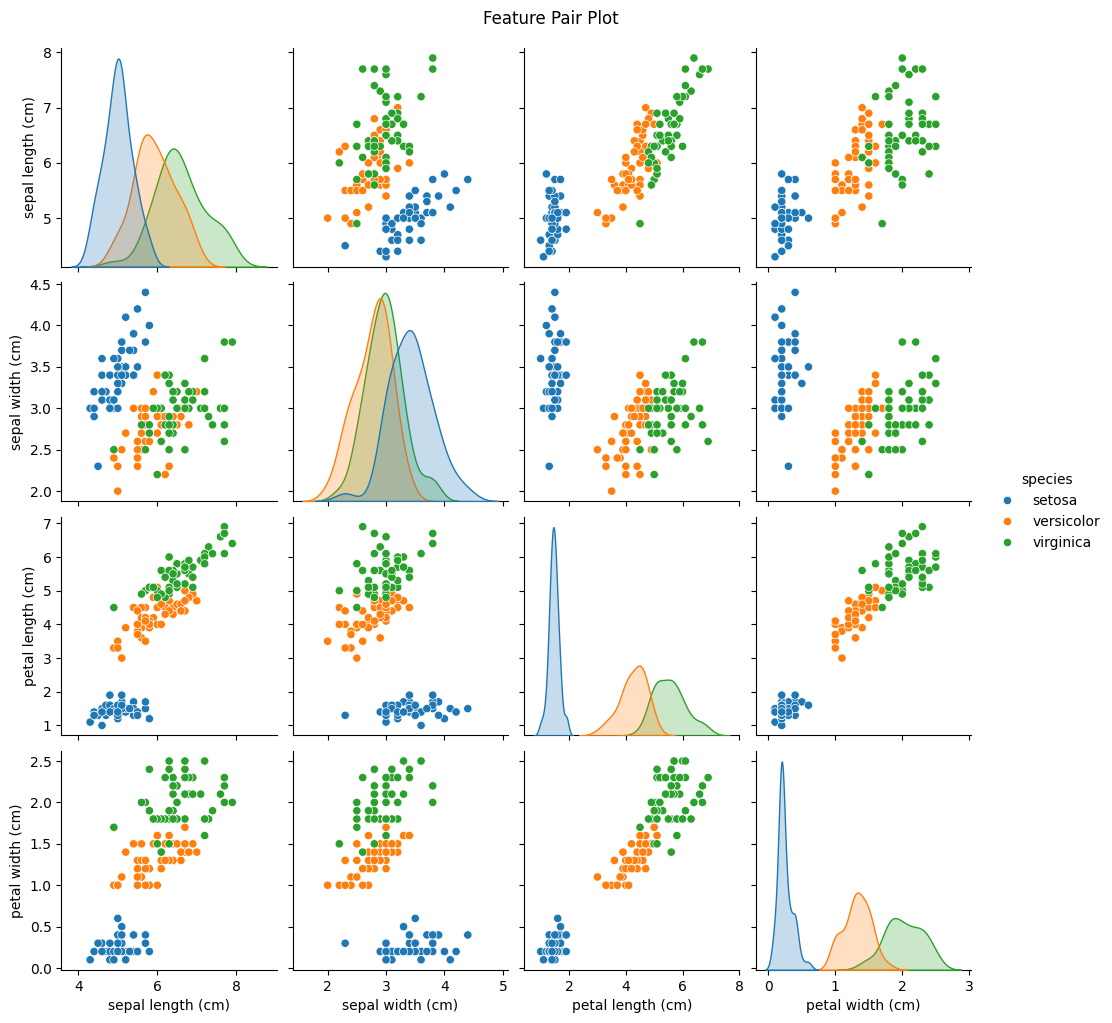

In [34]:
# ---------------------- 3. Exploratory Data Analysis ----------------------
sns.pairplot(pd.concat([X, y], axis=1), hue='species')
plt.suptitle("Feature Pair Plot", y=1.02)
plt.show()

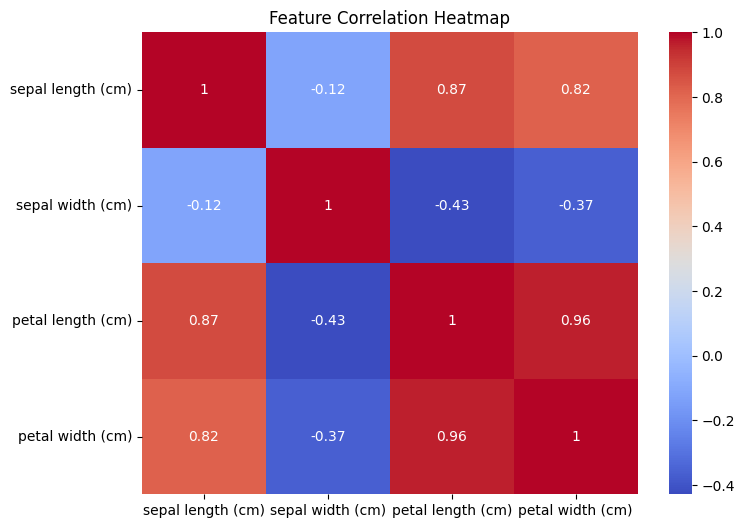

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

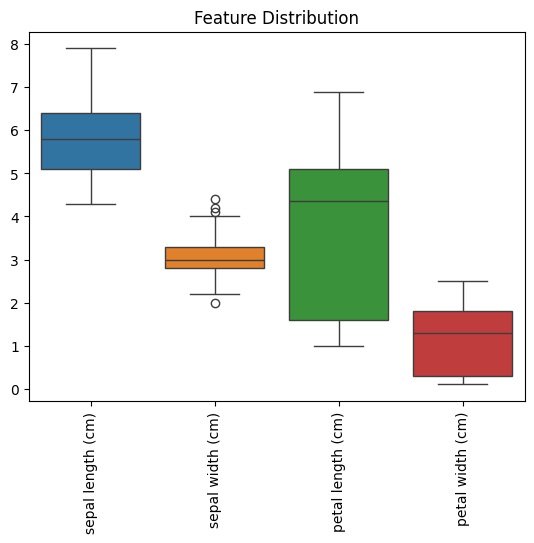

In [36]:
# Boxplot to visualize spread
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Feature Distribution")
plt.show()

In [37]:
# ---------------------- 4. Feature Engineering ----------------------
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print("Reduced Feature Shape after PCA:", X_pca.shape)

Reduced Feature Shape after PCA: (150, 2)


In [54]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)


In [55]:
# ---------------------- 5. Define Models and Hyperparameters ----------------------
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=200),
        'params': {'C': [0.1, 1, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100, 150]}
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7]}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [3, 5, None]}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {'n_estimators': [50, 100]}
    }
}

In [56]:
# ---------------------- 6. Grid Search & Model Evaluation ----------------------
best_models = []
print("\n--- Model Training & Hyperparameter Tuning ---\n")
for name, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    print(f"{name} -> Best Score: {clf.best_score_:.4f} | Best Params: {clf.best_params_}")
    best_models.append((name, clf.best_estimator_, clf.best_score_))


--- Model Training & Hyperparameter Tuning ---

LogisticRegression -> Best Score: 0.9333 | Best Params: {'C': 1}
SVM -> Best Score: 0.9333 | Best Params: {'C': 1, 'kernel': 'linear'}
RandomForest -> Best Score: 0.9167 | Best Params: {'n_estimators': 50}
GradientBoosting -> Best Score: 0.9333 | Best Params: {'learning_rate': 0.1, 'n_estimators': 50}
KNN -> Best Score: 0.9167 | Best Params: {'n_neighbors': 3}
DecisionTree -> Best Score: 0.9083 | Best Params: {'max_depth': 3}
AdaBoost -> Best Score: 0.9167 | Best Params: {'n_estimators': 50}


In [57]:
# Select best model
best_model = max(best_models, key=lambda x: x[2])
model_name, model_final, model_score = best_model

In [58]:
# ---------------------- 7. Final Evaluation ----------------------
y_pred = model_final.predict(X_test)
print(f"\n--- Final Evaluation of Best Model: {model_name} ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


--- Final Evaluation of Best Model: LogisticRegression ---
Accuracy: 0.9
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [76]:
# ---------------------- 8. Save Model & Scaler ----------------------
pickle.dump(model_final, open('iris_classifier.pkl', 'wb'))
pickle.dump(scaler, open('iris_scaler.pkl', 'wb'))
pickle.dump(pca, open('iris_pca.pkl', 'wb'))

In [77]:
print("\nModel, Scaler and PCA saved successfully.")


Model, Scaler and PCA saved successfully.


In [78]:
# Load model, scaler, and PCA
model_loaded = pickle.load(open('iris_classifier.pkl', 'rb'))
scaler_loaded = pickle.load(open('iris_scaler.pkl', 'rb'))
pca_loaded = pickle.load(open('iris_pca.pkl', 'rb'))

In [79]:
# Predict a new sample
sample = [[5.1, 3.5, 1.4, 0.2]]
sample_scaled = scaler_loaded.transform(sample)
sample_pca = pca_loaded.transform(sample_scaled)
prediction = model_loaded.predict(sample_pca)


In [80]:
print("Predicted class:", prediction[0])

Predicted class: setosa
